# Libraries Imported

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.preprocessing import MinMaxScaler
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, roc_curve, auc, roc_auc_score

# Project

## Loading data

In [2]:
loan_dataset = pd.read_csv("loan_approval_dataset.csv")
loan_dataset.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## Cleaning data

In [3]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [4]:
loan_dataset.describe(include = "all")

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269,4269,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Graduate,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Approved
freq,NaN,NaN,2144,2150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2656
mean,2135.000000,2.498712,NaN,NaN,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,NaN
std,1232.498479,1.695910,NaN,NaN,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,NaN
min,1.000000,0.000000,NaN,NaN,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,NaN
25%,1068.000000,1.000000,NaN,NaN,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,NaN
50%,2135.000000,3.000000,NaN,NaN,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,NaN
75%,3202.000000,4.000000,NaN,NaN,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,NaN


In [5]:
#Noticed a small detail in the columns' names
loan_dataset.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [6]:
#Except 'loan_id', all of them have a espace (' ') before the text, we need to fix this to prevent future confusion
loan_dataset.columns = loan_dataset.columns.str.replace(' ','')

In [7]:
#Checking if it worked
loan_dataset.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [8]:
#Noticed that the same think happens to the data of some collumns
print(loan_dataset['education'].unique())
print(loan_dataset['self_employed'].unique())
print(loan_dataset['loan_status'].unique())

[' Graduate' ' Not Graduate']
[' No' ' Yes']
[' Approved' ' Rejected']


In [9]:
#So we fixed it using the same method
loan_dataset['education'] = loan_dataset['education'].str.replace(' ','')
loan_dataset['self_employed'] = loan_dataset['self_employed'].str.replace(' ','')
loan_dataset['loan_status'] = loan_dataset['loan_status'].str.replace(' ','')

In [10]:
#Checking if it worked
print(loan_dataset['education'].unique())
print(loan_dataset['self_employed'].unique())
print(loan_dataset['loan_status'].unique())

['Graduate' 'NotGraduate']
['No' 'Yes']
['Approved' 'Rejected']


## Analyzing (maybe)

In [11]:
#Getting rid of loan_id
loan_clean = loan_dataset.drop(['loan_id'], axis = 1)

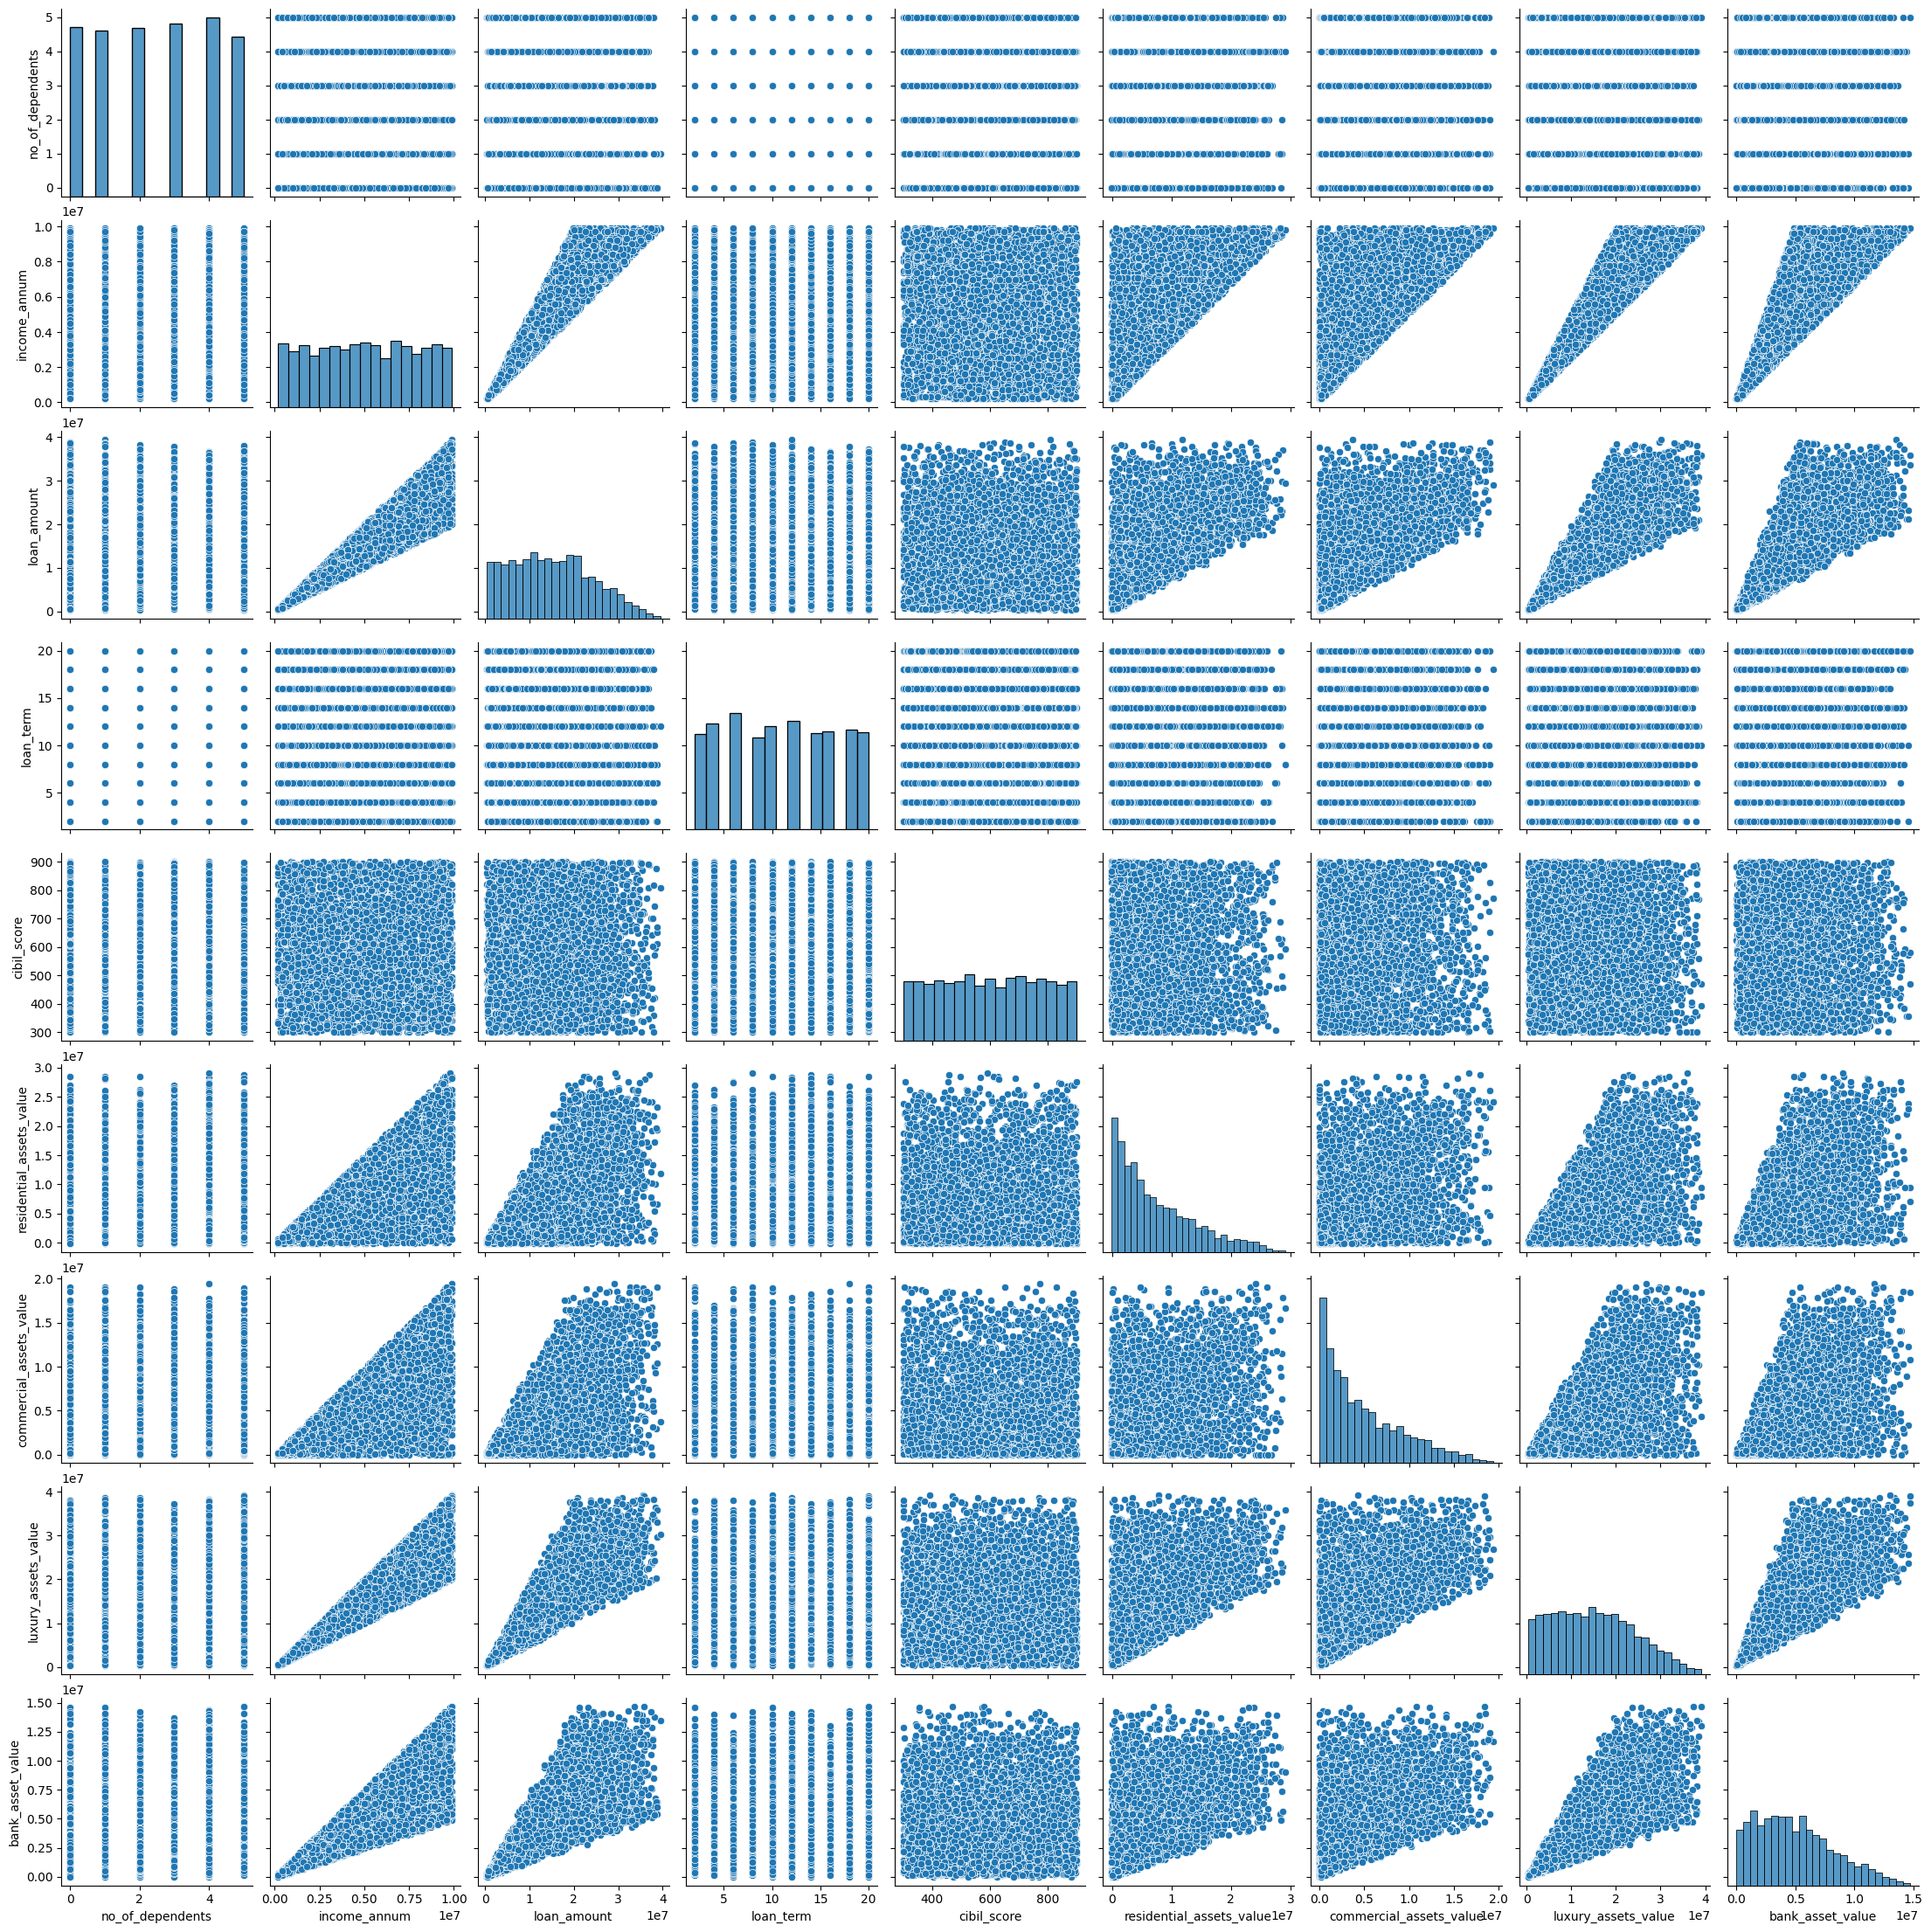

In [12]:
#Checking for positive correlations
sns.pairplot(loan_clean)

## Contructing Models

### Preparing Data

In [13]:
#Getting rid of loan_id
loan_no_loan_id = loan_dataset.drop(['loan_id'], axis = 1)

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education,self_employed,loan_status
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,True,False,True
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,False,True,False
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,True,False,False
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,True,False,False
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,False,True,False


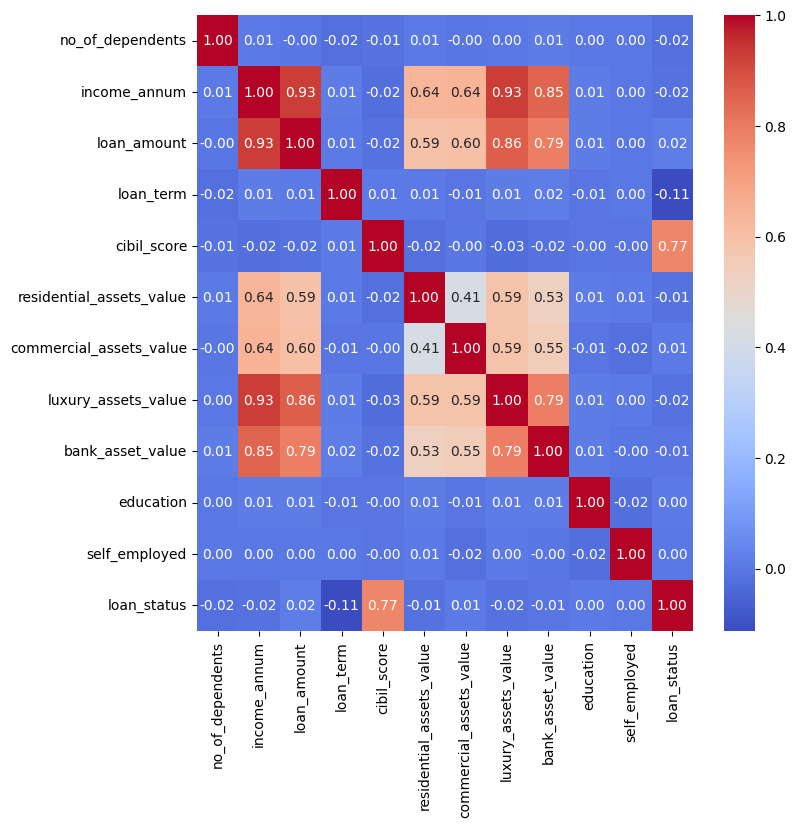

In [14]:
#Checking the correlation
loan_clean = pd.get_dummies(loan_no_loan_id, columns = ['education', 'self_employed', 'loan_status'], drop_first = False)
loan_clean.rename(columns = {'education_Graduate': 'education', 'self_employed_Yes': 'self_employed', 'loan_status_Approved': 'loan_status'}, inplace = True)
loan_clean.drop(['education_NotGraduate', 'self_employed_No', 'loan_status_Rejected'], axis = 1, inplace = True)
loan_corr = loan_clean.corr()
plt.figure(figsize = (8, 8))
sns.heatmap(loan_corr, annot = True, fmt=".2f", cmap="coolwarm")
loan_clean.head()

In [15]:
loan_corr

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education,self_employed,loan_status
no_of_dependents,1.000000,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163,0.002697,0.000765,-0.018114
income_annum,0.007266,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093,0.011625,0.002368,-0.015189
loan_amount,-0.003366,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122,0.010631,0.001450,0.016150
loan_term,-0.020111,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177,-0.008417,0.004107,-0.113036
cibil_score,-0.009998,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478,-0.004649,-0.004866,0.770518
residential_assets_value,0.007376,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418,0.010930,0.006144,-0.014367
commercial_assets_value,-0.001531,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576,-0.006763,-0.017998,0.008246
luxury_assets_value,0.002817,0.929145,0.860914,0.012490,-0.028618,0.590932,0.591128,1.000000,0.788517,0.012471,0.004413,-0.015465
bank_asset_value,0.011163,0.851093,0.788122,0.017177,-0.015478,0.527418,0.548576,0.788517,1.000000,0.009424,-0.000215,-0.006778
education,0.002697,0.011625,0.010631,-0.008417,-0.004649,0.010930,-0.006763,0.012471,0.009424,1.000000,-0.023224,0.004918


### Standardizing and spliting data

In [16]:
x = loan_clean.drop(['loan_status'], axis = 1)
y = loan_clean['loan_status']

x_train_almost, x_test_almost, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

scaler_minmax = MinMaxScaler()
x_train = pd.DataFrame(scaler_minmax.fit_transform(x_train_almost))
x_test = pd.DataFrame(scaler_minmax.transform(x_test_almost))

### Logistic Regression

In [17]:
model_lgr = LogisticRegression(random_state = 42)

### Support Vector Machines (SVM) Classification

In [18]:
model_svm = SVC(probability = True, random_state = 42)

### Random Forest Classification

In [19]:
model_rf = RandomForestClassifier(random_state = 42)

### Gradient Boosting Classification

In [20]:
model_gb = GradientBoostingClassifier(random_state = 42)

### Neural Networks

In [21]:
model_nn = MLPClassifier(max_iter = 1000, random_state = 42)

## Training the models

In [22]:
# To choose between StratifiedKFold and KFold
loan_clean['loan_status'].value_counts()

loan_status
True     2656
False    1613
Name: count, dtype: int64

### K-fold cross-validation, with ROC curves and mean AUC

#### Logistic Regression

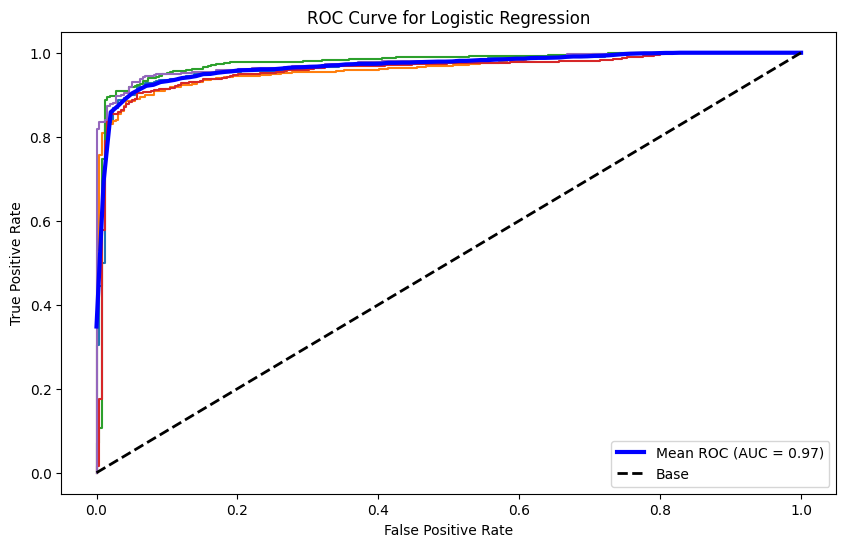

In [23]:
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

mean_fpr_lgr = np.linspace(0, 1, 100)
mean_tpr_lgr = 0

plt.figure(figsize = (10, 6))

for train, val in cv.split(x_train_almost, y_train):
    x_train_fold = pd.DataFrame(scaler_minmax.fit_transform(x_train_almost.iloc[train].values))
    x_val_fold = pd.DataFrame(scaler_minmax.transform(x_train_almost.iloc[val].values))
    y_train_fold = y_train.iloc[train].values.ravel()
    y_val_fold = y_train.iloc[val].values

    model_lgr.fit(x_train_fold, y_train_fold)
    pred_lgr_fold = model_lgr.predict_proba(x_val_fold)[:, 1]
    fpr, tpr, _ = roc_curve(y_val_fold, pred_lgr_fold)
    mean_tpr_lgr += np.interp(mean_fpr_lgr, fpr, tpr)

    plt.plot(fpr, tpr)

mean_tpr_lgr /= cv.get_n_splits()

mean_auc_lgr = auc(mean_fpr_lgr, mean_tpr_lgr)

plt.plot(mean_fpr_lgr, mean_tpr_lgr, linestyle = 'solid', color = 'b', label = f'Mean ROC (AUC = {mean_auc_lgr:.2f})', linewidth = 3)
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'black', label = 'Base', linewidth = 2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc = 'lower right')
plt.show()

#### Support Vector Machines (SVM) Classification

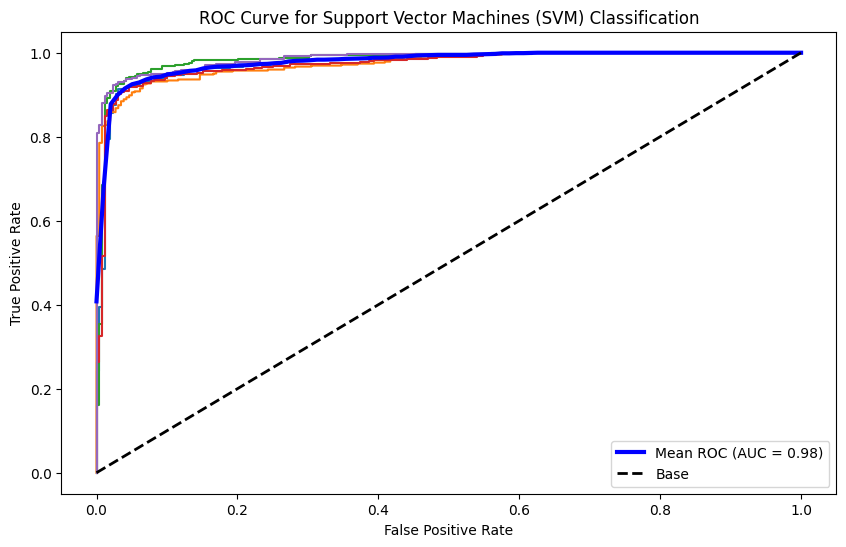

In [24]:
mean_fpr_svm = np.linspace(0, 1, 100)
mean_tpr_svm = 0

plt.figure(figsize = (10, 6))

for train, val in cv.split(x_train_almost, y_train):
    x_train_fold = pd.DataFrame(scaler_minmax.fit_transform(x_train_almost.iloc[train].values))
    x_val_fold = pd.DataFrame(scaler_minmax.transform(x_train_almost.iloc[val].values))
    y_train_fold = y_train.iloc[train].values.ravel()
    y_val_fold = y_train.iloc[val].values

    model_svm.fit(x_train_fold, y_train_fold)
    pred_svm_fold = model_svm.predict_proba(x_val_fold)[:, 1]
    fpr, tpr, _ = roc_curve(y_val_fold, pred_svm_fold)
    mean_tpr_svm += np.interp(mean_fpr_svm, fpr, tpr)

    plt.plot(fpr, tpr)

mean_tpr_svm /= cv.get_n_splits()

mean_auc_svm = auc(mean_fpr_svm, mean_tpr_svm)

plt.plot(mean_fpr_svm, mean_tpr_svm, linestyle = 'solid', color = 'b', label = f'Mean ROC (AUC = {mean_auc_svm:.2f})', linewidth = 3)
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'black', label = 'Base', linewidth = 2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Support Vector Machines (SVM) Classification')
plt.legend(loc = 'lower right')
plt.show()

#### Random Forest Classification

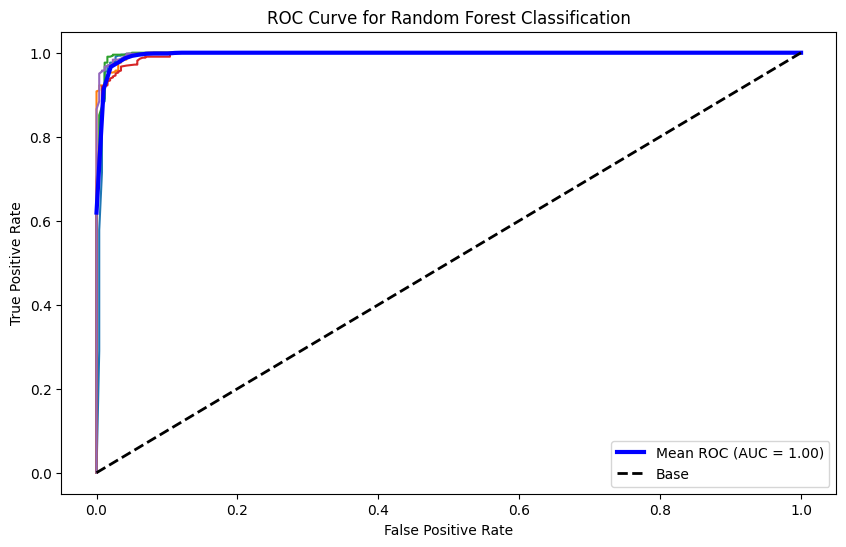

In [25]:
mean_fpr_rf = np.linspace(0, 1, 100)
mean_tpr_rf = 0

plt.figure(figsize = (10, 6))

for train, val in cv.split(x_train_almost, y_train):
    x_train_fold = pd.DataFrame(scaler_minmax.fit_transform(x_train_almost.iloc[train].values))
    x_val_fold = pd.DataFrame(scaler_minmax.transform(x_train_almost.iloc[val].values))
    y_train_fold = y_train.iloc[train].values.ravel()
    y_val_fold = y_train.iloc[val].values

    model_rf.fit(x_train_fold, y_train_fold)
    pred_rf_fold = model_rf.predict_proba(x_val_fold)[:, 1]
    fpr, tpr, _ = roc_curve(y_val_fold, pred_rf_fold)
    mean_tpr_rf += np.interp(mean_fpr_rf, fpr, tpr)

    plt.plot(fpr, tpr)

mean_tpr_rf /= cv.get_n_splits()

mean_auc_rf = auc(mean_fpr_rf, mean_tpr_rf)

plt.plot(mean_fpr_rf, mean_tpr_rf, linestyle = 'solid', color = 'b', label = f'Mean ROC (AUC = {mean_auc_rf:.2f})', linewidth = 3)
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'black', label = 'Base', linewidth = 2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classification')
plt.legend(loc = 'lower right')
plt.show()

#### Gradient Boosting Classification

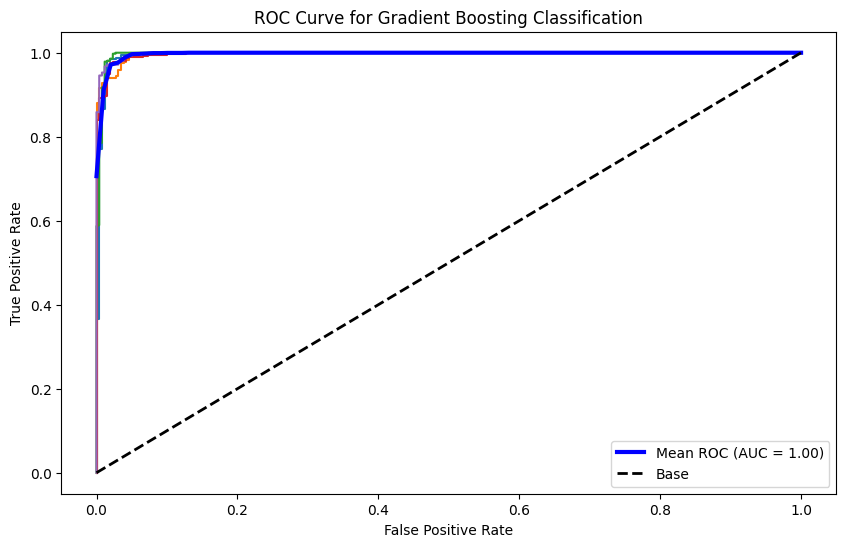

In [26]:
mean_fpr_gb = np.linspace(0, 1, 100)
mean_tpr_gb = 0

plt.figure(figsize = (10, 6))

for train, val in cv.split(x_train_almost, y_train):
    x_train_fold = pd.DataFrame(scaler_minmax.fit_transform(x_train_almost.iloc[train].values))
    x_val_fold = pd.DataFrame(scaler_minmax.transform(x_train_almost.iloc[val].values))
    y_train_fold = y_train.iloc[train].values.ravel()
    y_val_fold = y_train.iloc[val].values

    model_gb.fit(x_train_fold, y_train_fold)
    pred_gb_fold = model_gb.predict_proba(x_val_fold)[:, 1]
    fpr, tpr, _ = roc_curve(y_val_fold, pred_gb_fold)
    mean_tpr_gb += np.interp(mean_fpr_gb, fpr, tpr)

    plt.plot(fpr, tpr)

mean_tpr_gb /= cv.get_n_splits()

mean_auc_gb = auc(mean_fpr_gb, mean_tpr_gb)

plt.plot(mean_fpr_gb, mean_tpr_gb, linestyle = 'solid', color = 'b', label = f'Mean ROC (AUC = {mean_auc_gb:.2f})', linewidth = 3)
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'black', label = 'Base', linewidth = 2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting Classification')
plt.legend(loc = 'lower right')
plt.show()

#### Neural Networks

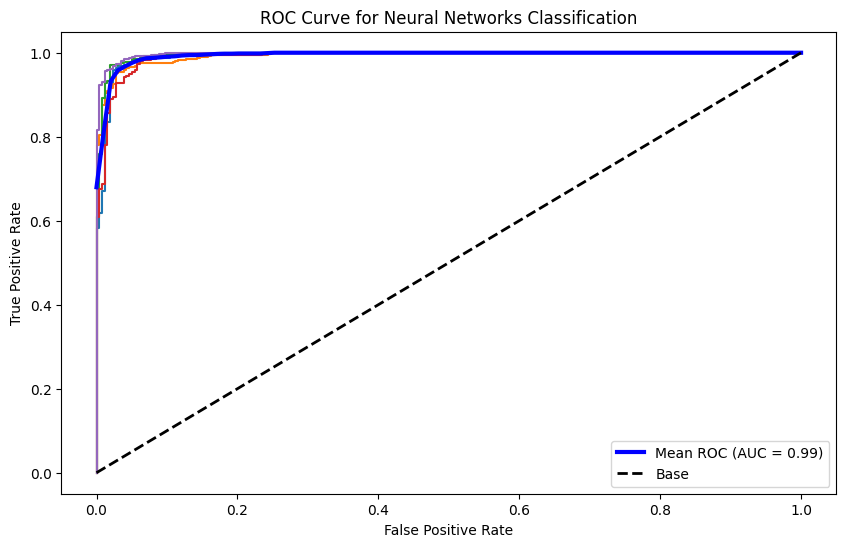

In [27]:
mean_fpr_nn = np.linspace(0, 1, 100)
mean_tpr_nn = 0

plt.figure(figsize = (10, 6))

for train, val in cv.split(x_train_almost, y_train):
    x_train_fold = pd.DataFrame(scaler_minmax.fit_transform(x_train_almost.iloc[train].values))
    x_val_fold = pd.DataFrame(scaler_minmax.transform(x_train_almost.iloc[val].values))
    y_train_fold = y_train.iloc[train].values.ravel()
    y_val_fold = y_train.iloc[val].values

    model_nn.fit(x_train_fold, y_train_fold)
    pred_nn_fold = model_nn.predict_proba(x_val_fold)[:, 1]
    fpr, tpr, _ = roc_curve(y_val_fold, pred_nn_fold)
    mean_tpr_nn += np.interp(mean_fpr_nn, fpr, tpr)

    plt.plot(fpr, tpr)

mean_tpr_nn /= cv.get_n_splits(x_train, y_train)

mean_auc_nn = auc(mean_fpr_nn, mean_tpr_nn)

plt.plot(mean_fpr_nn, mean_tpr_nn, linestyle = 'solid', color = 'b', label = f'Mean ROC (AUC = {mean_auc_nn:.2f})', linewidth = 3)
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'black', label = 'Base', linewidth = 2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Neural Networks Classification')
plt.legend(loc = 'lower right')
plt.show()

### Best subset selection - Logistic Regression

In [28]:
which_model_lgr = pd.DataFrame(columns=["k", "features", "accuracy", "precision", "recall", "f1_score", "roc_auc"])
count = 0

for k in range(1, x_train_almost.shape[1] + 1):
    print('Iterating for {} features.'.format(k))
    for combo in itertools.combinations(x_train_almost.columns, k):
        auc_scores = []
        for train_idx, val_idx in cv.split(x_train_almost[list(combo)], y_train):
            x_train_fold = pd.DataFrame(scaler_minmax.fit_transform(x_train_almost[list(combo)].iloc[train_idx]))
            x_val_fold = pd.DataFrame(scaler_minmax.transform(x_train_almost[list(combo)].iloc[val_idx]))
            y_train_fold = y_train.iloc[train_idx].values.ravel()
            y_val_fold = y_train.iloc[val_idx].values.ravel() 

            iter_X = x_train_almost[list(combo)]
            model_lgr = LogisticRegression(random_state = 42)
            model_lgr.fit(x_train_fold, y_train_fold)

            y_pred = model_lgr.predict(x_val_fold)
            accuracy = accuracy_score(y_val_fold, y_pred)
            precision = precision_score(y_val_fold, y_pred)
            recall = recall_score(y_val_fold, y_pred)
            f1_Score = f1_score(y_val_fold, y_pred)
            roc_auc = roc_auc_score(y_val_fold, y_pred)
            
            auc_scores.append(roc_auc)

        mean_auc = np.mean(auc_scores)

        iter_vals = [
            k, ', '.join(combo),
            accuracy,               # Accuracy
            precision,              # Precision
            recall,                 # Recall
            f1_Score,               # F1 Score
            mean_auc                # Mean AUC
        ]
        which_model_lgr.loc[count] = pd.DataFrame(
            [iter_vals],
            columns = ["k", "features", "accuracy", "precision", "recall", 'f1_Score', 'roc_auc']
        ).iloc[0,]
        count += 1
    
the_best_lgr = which_model_lgr.sort_values(by = 'roc_auc', ascending = False).head(20)

best_model_lgr = the_best_lgr.iloc[0]
best_features_lgr = best_model_lgr['features'].split(', ')
mean_auc_lgr = best_model_lgr['roc_auc']

final_x_train_lgr = pd.DataFrame(scaler_minmax.fit_transform(x_train_almost[best_features_lgr]))
best_model_lgr = model_lgr
best_model_lgr.fit(final_x_train_lgr, y_train.values.ravel())
print('-----------------')
print(f'Best Features: {best_features_lgr}')
print(f'Best Subset Logistic Regression Model Trained with Mean AUC: {mean_auc_lgr:.4f}')

Iterating for 1 features.
Iterating for 2 features.
Iterating for 3 features.
Iterating for 4 features.
Iterating for 5 features.
Iterating for 6 features.
Iterating for 7 features.
Iterating for 8 features.
Iterating for 9 features.
Iterating for 10 features.
Iterating for 11 features.
-----------------
Best Features: ['income_annum', 'loan_amount', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'bank_asset_value', 'self_employed']
Best Subset Logistic Regression Model Trained with Mean AUC: 0.9178


### Grid Search cross-validation and Foward stepwise selection - Other Models

#### Support Vector Machines (SVM) Classification

In [29]:
grid_parameters_svm = {'C' : [0.1, 1, 10, 100], 'kernel': ['linear', 'poly', 'rbf']}

grid_search_svm = GridSearchCV(model_svm, grid_parameters_svm, cv = 5, scoring = 'roc_auc', n_jobs = -1)

grid_search_svm.fit(x_train, y_train.values.ravel())

best_params_svm = grid_search_svm.best_params_
best_mean_auc_svm = grid_search_svm.best_score_

print('Best Hyperparameters:', best_params_svm)
print(f'Mean AUC: {best_mean_auc_svm:.4f}')

Best Hyperparameters: {'C': 10, 'kernel': 'rbf'}
Mean AUC: 0.9870


Forward stepwise selection with the best parameters obtained in the grid search

In [30]:
best_model_svm = SVC(probability = True, C = 10, kernel = 'rbf', random_state = 42)
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

features = list(x_train_almost.columns)
best_features_svm = []
selected_features_svm = []
best_auc_svm = -1

while features:
    current_auc_scores_svm = []

    for feature in features:
        current_features = best_features_svm + [feature]

        if feature in best_features_svm:
            continue

        auc_scores_svm = []

        for train_idx, val_idx in cv.split(x_train_almost[current_features], y_train):
            x_train_fold = pd.DataFrame(scaler_minmax.fit_transform(x_train_almost[current_features].iloc[train_idx]))
            x_val_fold = pd.DataFrame(scaler_minmax.transform(x_train_almost[current_features].iloc[val_idx]))
            y_train_fold = y_train.iloc[train_idx].values.ravel()
            y_val_fold = y_train.iloc[val_idx].values.ravel() 

            model_subset = SVC(probability = True, C = 10, kernel = 'rbf', random_state = 42)
            model_subset.fit(x_train_fold, y_train_fold)

            y_pred = model_subset.predict(x_val_fold)
            auc_svm = roc_auc_score(y_val_fold, y_pred)
            auc_scores_svm.append(auc_svm)

        mean_auc = np.mean(auc_scores_svm)
        current_auc_scores_svm.append(mean_auc)

    best_index = np.argmax(current_auc_scores_svm)
    best_feature = features[best_index]
    best_feature_auc = current_auc_scores_svm[best_index]
    selected_features_svm.append(best_feature)
    features.remove(best_feature)

    print(f'Selected Features: {selected_features_svm}')
    print(f'Mean AUC Score: {best_feature_auc:.4f}')

    if best_feature_auc > best_auc_svm:
        best_auc_svm = best_feature_auc
        best_features_svm.append(best_feature)
        
        print(f'---> Best Features so far: {best_features_svm}')

final_x_train_svm = pd.DataFrame(scaler_minmax.fit_transform(x_train_almost[best_features_svm]))
best_model_svm.fit(final_x_train_svm, y_train.values.ravel())

print('-----------------')
print(f'Best Features: {best_features_svm}')
print(f'Final Mean AUC: {best_auc_svm:.4f}')

Selected Features: ['cibil_score']
Mean AUC Score: 0.9590
---> Best Features so far: ['cibil_score']
Selected Features: ['cibil_score', 'income_annum']
Mean AUC Score: 0.9570
Selected Features: ['cibil_score', 'income_annum', 'self_employed']
Mean AUC Score: 0.9570
Selected Features: ['cibil_score', 'income_annum', 'self_employed', 'luxury_assets_value']
Mean AUC Score: 0.9569
Selected Features: ['cibil_score', 'income_annum', 'self_employed', 'luxury_assets_value', 'residential_assets_value']
Mean AUC Score: 0.9569
Selected Features: ['cibil_score', 'income_annum', 'self_employed', 'luxury_assets_value', 'residential_assets_value', 'education']
Mean AUC Score: 0.9557
Selected Features: ['cibil_score', 'income_annum', 'self_employed', 'luxury_assets_value', 'residential_assets_value', 'education', 'commercial_assets_value']
Mean AUC Score: 0.9545
Selected Features: ['cibil_score', 'income_annum', 'self_employed', 'luxury_assets_value', 'residential_assets_value', 'education', 'commerci

#### Random Forest

In [31]:
grid_parameters_rf = {'n_estimators' : [50, 100, 150, 200, 250, 300, 350, 400, 450, 500], 'max_depth': [None, 10, 20, 30, 40, 50]}

grid_search_rf = GridSearchCV(model_rf, grid_parameters_rf, cv = 5, scoring = 'roc_auc', n_jobs = -1)

grid_search_rf.fit(x_train, y_train.values.ravel())

best_params_rf = grid_search_rf.best_params_
best_mean_auc_rf = grid_search_rf.best_score_

print('Best Hyperparameters:', best_params_rf)
print(f'Mean AUC: {best_mean_auc_rf:.4f}')

Best Hyperparameters: {'max_depth': 20, 'n_estimators': 450}
Mean AUC: 0.9979


Forward stepwise selection with the best parameters obtained in the grid search

In [32]:
best_model_rf = RandomForestClassifier(max_depth = 20, n_estimators = 450, random_state = 42)
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

features = list(x_train_almost.columns)
best_features_rf = []
selected_features_rf = []
best_auc_rf = -1

while features:
    current_auc_scores_rf = []

    for feature in features:
        current_features = best_features_rf + [feature]

        if feature in best_features_rf:
            continue

        auc_scores_rf = []

        for train_idx, val_idx in cv.split(x_train_almost[current_features], y_train):
            x_train_fold = pd.DataFrame(scaler_minmax.fit_transform(x_train_almost[current_features].iloc[train_idx]))
            x_val_fold = pd.DataFrame(scaler_minmax.transform(x_train_almost[current_features].iloc[val_idx]))
            y_train_fold = y_train.iloc[train_idx].values.ravel()
            y_val_fold = y_train.iloc[val_idx].values.ravel() 

            model_subset = RandomForestClassifier(max_depth = 20, n_estimators = 450, random_state = 42)
            model_subset.fit(x_train_fold, y_train_fold)

            y_pred = model_subset.predict(x_val_fold)
            auc_rf = roc_auc_score(y_val_fold, y_pred)
            auc_scores_rf.append(auc_rf)

        mean_auc = np.mean(auc_scores_rf)
        current_auc_scores_rf.append(mean_auc)

    best_index = np.argmax(current_auc_scores_rf)
    best_feature = features[best_index]
    best_feature_auc = current_auc_scores_rf[best_index]
    selected_features_rf.append(best_feature)
    features.remove(best_feature)

    print(f'Selected Features: {selected_features_rf}')
    print(f'Mean AUC Score: {best_feature_auc:.4f}')

    if best_feature_auc > best_auc_rf:
        best_auc_rf = best_feature_auc
        best_features_rf.append(best_feature)

        print(f'---> Best Features so far: {best_features_rf}')

final_x_train_rf = pd.DataFrame(scaler_minmax.fit_transform(x_train_almost[best_features_rf]))
best_model_rf.fit(final_x_train_rf, y_train.values.ravel())

print('-----------------')
print(f'Best Features: {best_features_rf}')
print(f'Final Mean AUC: {best_auc_rf:.4f}')

Selected Features: ['cibil_score']
Mean AUC Score: 0.9571
---> Best Features so far: ['cibil_score']
Selected Features: ['cibil_score', 'commercial_assets_value']
Mean AUC Score: 0.9507
Selected Features: ['cibil_score', 'commercial_assets_value', 'residential_assets_value']
Mean AUC Score: 0.9507
Selected Features: ['cibil_score', 'commercial_assets_value', 'residential_assets_value', 'bank_asset_value']
Mean AUC Score: 0.9497
Selected Features: ['cibil_score', 'commercial_assets_value', 'residential_assets_value', 'bank_asset_value', 'luxury_assets_value']
Mean AUC Score: 0.9489
Selected Features: ['cibil_score', 'commercial_assets_value', 'residential_assets_value', 'bank_asset_value', 'luxury_assets_value', 'loan_amount']
Mean AUC Score: 0.9484
Selected Features: ['cibil_score', 'commercial_assets_value', 'residential_assets_value', 'bank_asset_value', 'luxury_assets_value', 'loan_amount', 'loan_term']
Mean AUC Score: 0.9465
Selected Features: ['cibil_score', 'commercial_assets_val

#### Gradient Boosting

In [33]:
grid_parameters_gb = {'learning_rate' : [0.01, 0.1, 0.2, 0.3, 0.4, 0.5], 'n_estimators' : [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]}

grid_search_gb = GridSearchCV(model_gb, grid_parameters_gb, cv = 5, scoring = 'roc_auc', n_jobs = -1)

grid_search_gb.fit(x_train, y_train.values.ravel())

best_params_gb = grid_search_gb.best_params_
best_mean_auc_gb = grid_search_gb.best_score_

print('Best Hyperparameters:', best_params_gb)
print(f'Mean AUC: {best_mean_auc_gb:.4f}')

Best Hyperparameters: {'learning_rate': 0.2, 'n_estimators': 50}
Mean AUC: 0.9979


Forward stepwise selection with the best parameters obtained in the grid search

In [34]:
best_model_gb = GradientBoostingClassifier(learning_rate = 0.2, n_estimators = 50, random_state = 42)
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

features = list(x_train_almost.columns)
best_features_gb = []
selected_features_gb = []
best_auc_gb = -1

while features:
    current_auc_scores_gb = []

    for feature in features:
        current_features = best_features_gb + [feature]

        if feature in best_features_gb:
            continue

        auc_scores_gb = []

        for train_idx, val_idx in cv.split(x_train_almost[current_features], y_train):
            x_train_fold = pd.DataFrame(scaler_minmax.fit_transform(x_train_almost[current_features].iloc[train_idx]))
            x_val_fold = pd.DataFrame(scaler_minmax.transform(x_train_almost[current_features].iloc[val_idx]))
            y_train_fold = y_train.iloc[train_idx].values.ravel()
            y_val_fold = y_train.iloc[val_idx].values.ravel() 

            model_subset = GradientBoostingClassifier(learning_rate = 0.2, n_estimators = 50, random_state = 42)
            model_subset.fit(x_train_fold, y_train_fold)

            y_pred = model_subset.predict(x_val_fold)
            auc_gb = roc_auc_score(y_val_fold, y_pred)
            auc_scores_gb.append(auc_gb)

        mean_auc = np.mean(auc_scores_gb)
        current_auc_scores_gb.append(mean_auc)

    best_index = np.argmax(current_auc_scores_gb)
    best_feature = features[best_index]
    best_feature_auc = current_auc_scores_gb[best_index]
    selected_features_gb.append(best_feature)
    features.remove(best_feature)

    print(f'Selected Features: {selected_features_gb}')
    print(f'Mean AUC Score: {best_feature_auc:.4f}')

    if best_feature_auc > best_auc_gb:
        best_auc_gb = best_feature_auc
        best_features_gb.append(best_feature)
        
        print(f'---> Best Features so far: {best_features_gb}')

final_x_train_gb = pd.DataFrame(scaler_minmax.fit_transform(x_train_almost[best_features_gb]))
best_model_gb.fit(final_x_train_gb, y_train.values.ravel())

print('-----------------')
print(f'Best Features: {best_features_gb}')
print(f'Final Mean AUC: {best_auc_gb:.4f}')

Selected Features: ['cibil_score']
Mean AUC Score: 0.9595
---> Best Features so far: ['cibil_score']
Selected Features: ['cibil_score', 'self_employed']
Mean AUC Score: 0.9590
Selected Features: ['cibil_score', 'self_employed', 'no_of_dependents']
Mean AUC Score: 0.9581
Selected Features: ['cibil_score', 'self_employed', 'no_of_dependents', 'residential_assets_value']
Mean AUC Score: 0.9581
Selected Features: ['cibil_score', 'self_employed', 'no_of_dependents', 'residential_assets_value', 'education']
Mean AUC Score: 0.9579
Selected Features: ['cibil_score', 'self_employed', 'no_of_dependents', 'residential_assets_value', 'education', 'income_annum']
Mean AUC Score: 0.9576
Selected Features: ['cibil_score', 'self_employed', 'no_of_dependents', 'residential_assets_value', 'education', 'income_annum', 'loan_amount']
Mean AUC Score: 0.9573
Selected Features: ['cibil_score', 'self_employed', 'no_of_dependents', 'residential_assets_value', 'education', 'income_annum', 'loan_amount', 'commer

#### Neural Netwroks

In [35]:
grid_parameters_nn   = {'learning_rate_init' : [0.001, 0.01, 0.1], 'hidden_layer_sizes' : [(50, ), (100, ), (50, 50), (100, 50, 25)]}

grid_search_nn = GridSearchCV(model_nn, grid_parameters_nn, cv = 5, scoring = 'roc_auc', n_jobs = -1)

grid_search_nn.fit(x_train, y_train.values.ravel())

best_params_nn = grid_search_nn.best_params_
best_mean_auc_nn = grid_search_nn.best_score_

print('Best Hyperparameters:', best_params_nn)
print(f'Mean AUC: {best_mean_auc_nn:.4f}')

Best Hyperparameters: {'hidden_layer_sizes': (50,), 'learning_rate_init': 0.1}
Mean AUC: 0.9953


Forward stepwise selection with the best parameters obtained in the grid search

In [36]:
best_model_nn = MLPClassifier(hidden_layer_sizes = (50, ), learning_rate_init = 0.1, max_iter = 1000, random_state = 42)
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

features = list(x_train_almost.columns)
best_features_nn = []
selected_features_nn = []
best_auc_nn = -1

while features:
    current_auc_scores_nn = []

    for feature in features:
        current_features = best_features_nn + [feature]

        if feature in best_features_nn:
            continue

        auc_scores_nn = []

        for train_idx, val_idx in cv.split(x_train_almost[current_features], y_train):
            x_train_fold = pd.DataFrame(scaler_minmax.fit_transform(x_train_almost[current_features].iloc[train_idx]))
            x_val_fold = pd.DataFrame(scaler_minmax.transform(x_train_almost[current_features].iloc[val_idx]))
            y_train_fold = y_train.iloc[train_idx].values.ravel()
            y_val_fold = y_train.iloc[val_idx].values.ravel() 

            model_subset = MLPClassifier(hidden_layer_sizes = (50, ), learning_rate_init = 0.1, max_iter = 1000, random_state = 42)
            model_subset.fit(x_train_fold, y_train_fold)

            y_pred = model_subset.predict(x_val_fold)
            auc_nn = roc_auc_score(y_val_fold, y_pred)
            auc_scores_nn.append(auc_nn)

        mean_auc = np.mean(auc_scores_nn)
        current_auc_scores_nn.append(mean_auc)

    best_index = np.argmax(current_auc_scores_nn)
    best_feature = features[best_index]
    best_feature_auc = current_auc_scores_nn[best_index]
    selected_features_nn.append(best_feature)
    features.remove(best_feature)

    print(f'Selected Features: {selected_features_nn}')
    print(f'Mean AUC Score: {best_feature_auc:.4f}')

    if best_feature_auc > best_auc_nn:
        best_auc_nn = best_feature_auc
        best_features_nn.append(best_feature)
        
        print(f'---> Best Features so far: {best_features_nn}')

final_x_train_nn = pd.DataFrame(scaler_minmax.fit_transform(x_train_almost[best_features_nn]))
best_model_nn.fit(final_x_train_nn, y_train.values.ravel())

print('-----------------')
print(f'Best Features: {best_features_nn}')
print(f'Final Mean AUC: {best_auc_nn:.4f}')

Selected Features: ['cibil_score']
Mean AUC Score: 0.9374
---> Best Features so far: ['cibil_score']
Selected Features: ['cibil_score', 'commercial_assets_value']
Mean AUC Score: 0.9535
---> Best Features so far: ['cibil_score', 'commercial_assets_value']
Selected Features: ['cibil_score', 'commercial_assets_value', 'loan_amount']
Mean AUC Score: 0.9536
---> Best Features so far: ['cibil_score', 'commercial_assets_value', 'loan_amount']
Selected Features: ['cibil_score', 'commercial_assets_value', 'loan_amount', 'self_employed']
Mean AUC Score: 0.9489
Selected Features: ['cibil_score', 'commercial_assets_value', 'loan_amount', 'self_employed', 'education']
Mean AUC Score: 0.9488
Selected Features: ['cibil_score', 'commercial_assets_value', 'loan_amount', 'self_employed', 'education', 'no_of_dependents']
Mean AUC Score: 0.9464
Selected Features: ['cibil_score', 'commercial_assets_value', 'loan_amount', 'self_employed', 'education', 'no_of_dependents', 'loan_term']
Mean AUC Score: 0.9450

### Final Train

In [37]:
# Losgistic Regression
best_model_lgr.fit(x_train, y_train.values.ravel())

# Support Vector Machines (SVM) Classification
best_model_svm.fit(x_train, y_train.values.ravel())

# Random Forest Classification
best_model_rf.fit(x_train, y_train.values.ravel())

# Gradient Boosting Classification
best_model_gb.fit(x_train, y_train.values.ravel())

# Neural Networks Classification
best_model_nn.fit(x_train, y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=1000,
              random_state=42)

## Test and Compare

### Test

In [38]:
# Losgistic Regression
y_pred_lgr = best_model_lgr.predict(x_test)

# Support Vector Machines (SVM) Classification
y_pred_svm = best_model_svm.predict(x_test)

# Random Forest Classification
y_pred_rf = best_model_rf.predict(x_test)

# Gradient Boosting Classification
y_pred_gb = best_model_gb.predict(x_test)

# Neural Networks Classification
y_pred_nn = best_model_nn.predict(x_test)

### Performance Metrics

#### Accuracy

In [39]:
accuracy_lgr = accuracy_score(y_test, y_pred_lgr)
print(f'Accuracy of Logistic Regression : {accuracy_lgr:.3f}')
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy of Support Vector Machines : {accuracy_svm:.3f}')
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy of Random Forest : {accuracy_rf:.3f}') 
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Accuracy of Gradient Boosting : {accuracy_gb:.3f}')
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f'Accuracy of Neural Networks : {accuracy_nn:.3f}')

Accuracy of Logistic Regression : 0.912
Accuracy of Support Vector Machines : 0.932
Accuracy of Random Forest : 0.979
Accuracy of Gradient Boosting : 0.978
Accuracy of Neural Networks : 0.951


#### Precision

In [40]:
precision_lgr = precision_score(y_test, y_pred_lgr)
print(f'Precision of Logistic Regression : {precision_lgr:.3f}')
precision_svm = precision_score(y_test, y_pred_svm)
print(f'Precision of Support Vector Machines : {precision_svm:.3f}')
precision_rf = precision_score(y_test, y_pred_rf)
print(f'Precision of Random Forest : {precision_rf:.3f}')
precision_gb = precision_score(y_test, y_pred_gb)
print(f'Precision of Gradient Boosting : {precision_gb:.3f}')
precision_nn = precision_score(y_test, y_pred_nn)
print(f'Precision of Neural Networks : {precision_nn:.3f}')

Precision of Logistic Regression : 0.926
Precision of Support Vector Machines : 0.951
Precision of Random Forest : 0.980
Precision of Gradient Boosting : 0.978
Precision of Neural Networks : 0.941


#### Recall

In [41]:
recall_lgr = recall_score(y_test, y_pred_lgr)
print(f'Recall of Logistic Regression : {recall_lgr:.3f}')
recall_svm = recall_score(y_test, y_pred_svm)
print(f'Recall of Support Vector Machines : {recall_svm:.3f}')
recall_rf = recall_score(y_test, y_pred_rf)
print(f'Recall of Random Forest : {recall_rf:.3f}')
recall_gb = recall_score(y_test, y_pred_gb)
print(f'Recall of Gradient Boosting : {recall_gb:.3f}')
recall_nn = recall_score(y_test, y_pred_nn)
print(f'Recall of Neural Networks : {recall_nn:.3f}')

Recall of Logistic Regression : 0.935
Recall of Support Vector Machines : 0.940
Recall of Random Forest : 0.987
Recall of Gradient Boosting : 0.987
Recall of Neural Networks : 0.983


#### F1 Score

In [42]:
f1score_lgr = f1_score(y_test, y_pred_lgr)
print(f'F1 Score of Logistic Regression : {f1score_lgr:.3f}')
f1score_svm = f1_score(y_test, y_pred_svm)
print(f'F1 Score of Support Vector Machines : {f1score_svm:.3f}')
f1score_rf = f1_score(y_test, y_pred_rf)
print(f'F1 Score of Random Forest : {f1score_rf:.3f}')
f1score_gb = f1_score(y_test, y_pred_gb)
print(f'F1 Score of Gradient Boosting : {f1score_gb:.3f}')
f1score_nn = f1_score(y_test, y_pred_nn)
print(f'F1 Score of Neural Networks : {f1score_nn:.3f}')

F1 Score of Logistic Regression : 0.930
F1 Score of Support Vector Machines : 0.946
F1 Score of Random Forest : 0.983
F1 Score of Gradient Boosting : 0.982
F1 Score of Neural Networks : 0.962


### Feature importance

#### Losgistic Regression

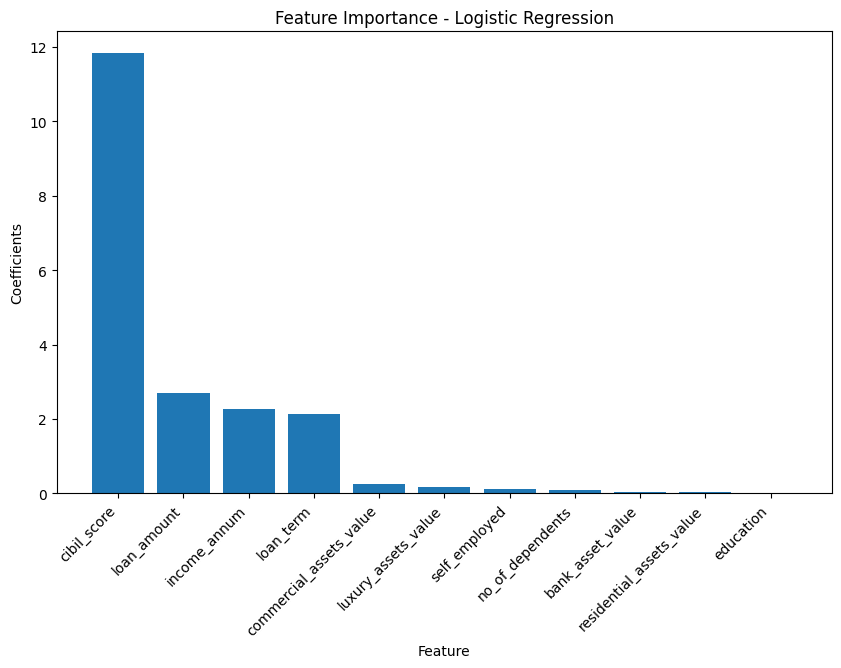

In [43]:
coefficients_lgr = np.abs(best_model_lgr.coef_[0])

feature_importance_df_lgr = pd.DataFrame({'Feature': x_train_almost.columns, 'Coefficients': coefficients_lgr})

feature_importance_df_lgr = feature_importance_df_lgr.sort_values(by = 'Coefficients', ascending = False)

plt.figure(figsize = (10, 6))
plt.bar(feature_importance_df_lgr['Feature'], feature_importance_df_lgr['Coefficients'])
plt.xlabel('Feature')
plt.ylabel('Coefficients')
plt.title('Feature Importance - Logistic Regression')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

#### Support Vector Machines (SVM) Classification

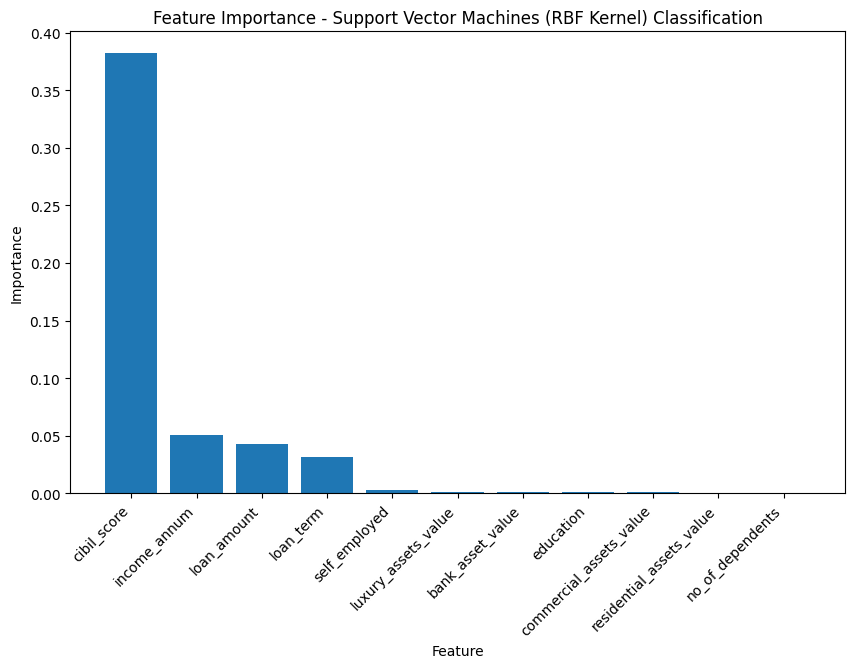

In [44]:
result_svm = permutation_importance(best_model_svm, x_test, y_test, n_repeats = 10, random_state = 42)

feature_importances_svm = np.abs(result_svm.importances_mean)

feature_importance_df_svm = pd.DataFrame({'Feature': x_train_almost.columns, 'Importance': feature_importances_svm})

feature_importance_df_svm = feature_importance_df_svm.sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (10, 6))
plt.bar(feature_importance_df_svm['Feature'], feature_importance_df_svm['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance - Support Vector Machines (RBF Kernel) Classification')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

#### Random Forest Classification

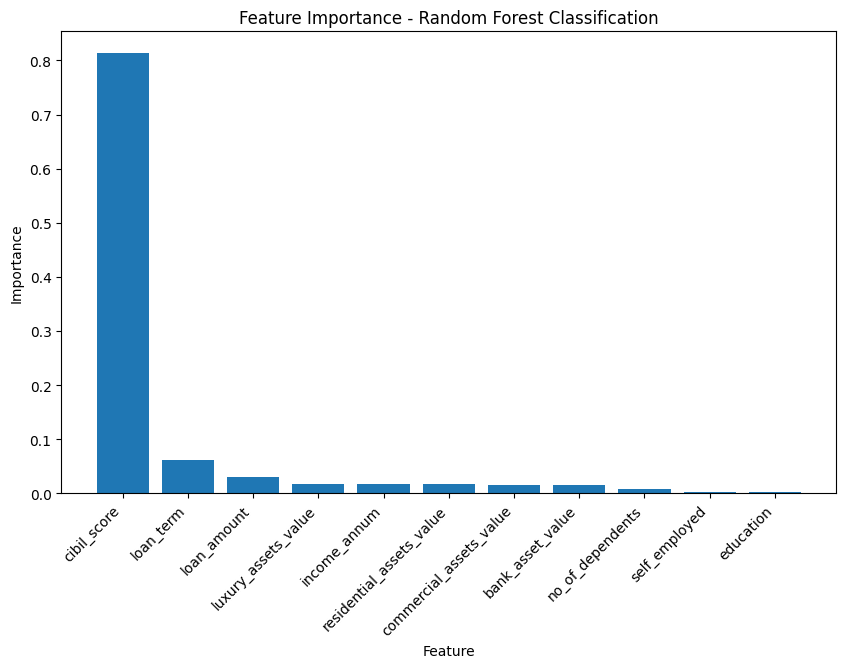

In [45]:
feature_importance_rf = best_model_rf.feature_importances_

feature_importance_df_rf = pd.DataFrame({'Feature': x_train_almost.columns, 'Importance': feature_importance_rf})

feature_importance_df_rf = feature_importance_df_rf.sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (10, 6))
plt.bar(feature_importance_df_rf['Feature'], feature_importance_df_rf['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance - Random Forest Classification')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

#### Gradient Boosting Classification

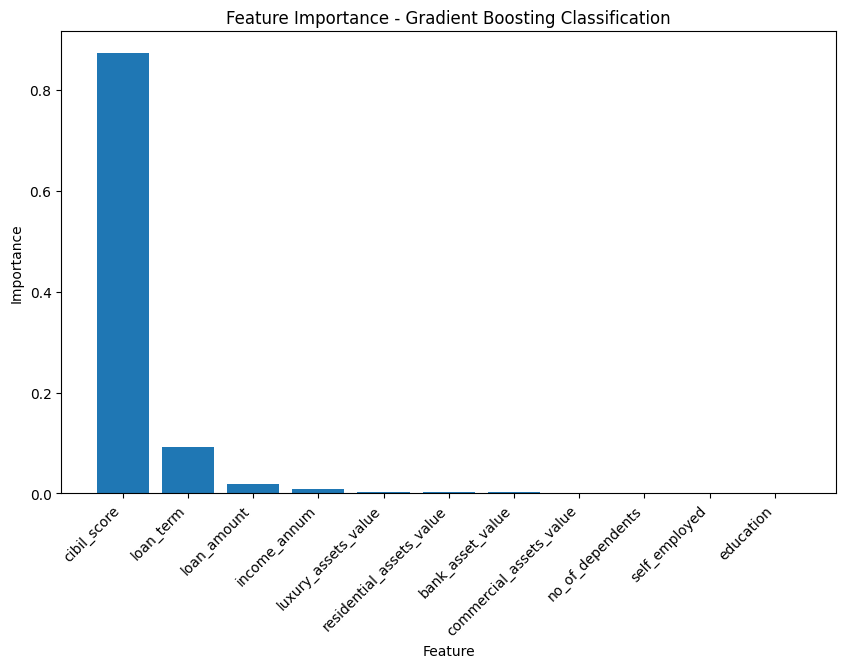

In [46]:
feature_importance_gb = best_model_gb.feature_importances_

feature_importance_df_gb = pd.DataFrame({'Feature': x_train_almost.columns, 'Importance': feature_importance_gb})

feature_importance_df_gb = feature_importance_df_gb.sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (10, 6))
plt.bar(feature_importance_df_gb['Feature'], feature_importance_df_gb['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance - Gradient Boosting Classification')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

#### Neural Networks Classification

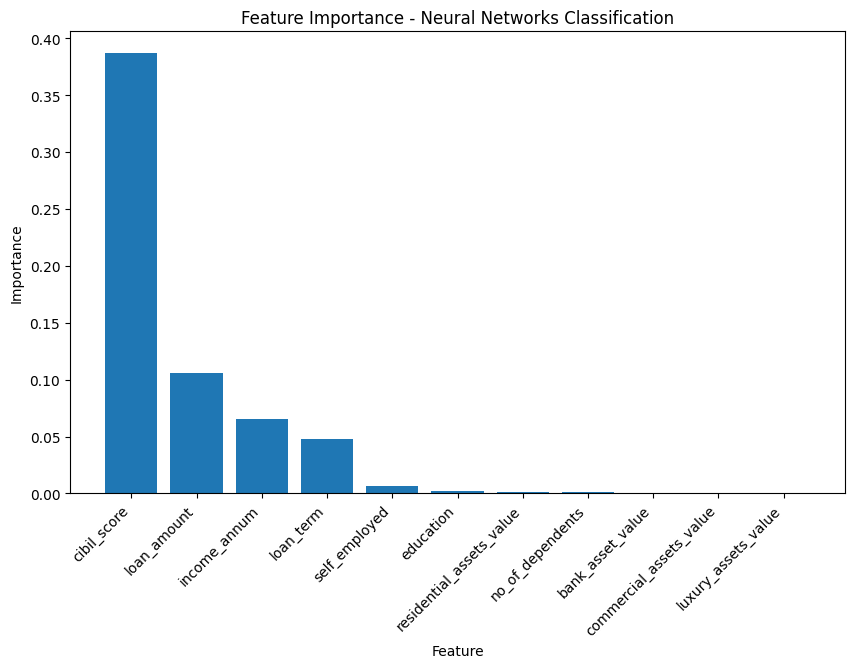

In [47]:
result_nn = permutation_importance(best_model_nn, x_test, y_test, n_repeats = 10, random_state = 42)

feature_importances_nn = np.abs(result_nn.importances_mean)

feature_importance_df_nn = pd.DataFrame({'Feature': x_train_almost.columns, 'Importance': feature_importances_nn})

feature_importance_df_nn = feature_importance_df_nn.sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (10, 6))
plt.bar(feature_importance_df_nn['Feature'], feature_importance_df_nn['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance - Neural Networks Classification')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

# Performance of Random Forest without cibil_score

In [48]:
x2 = loan_clean.drop(['cibil_score','loan_status'], axis = 1)
y2 = loan_clean['loan_status']

x_train_almost2, x_test_almost2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 0.2, random_state = 42)

scaler_minmax2 = MinMaxScaler()
x_train2 = pd.DataFrame(scaler_minmax2.fit_transform(x_train_almost2))
x_test2 = pd.DataFrame(scaler_minmax2.transform(x_test_almost2))

In [49]:
model_rf2 = RandomForestClassifier(random_state = 42)

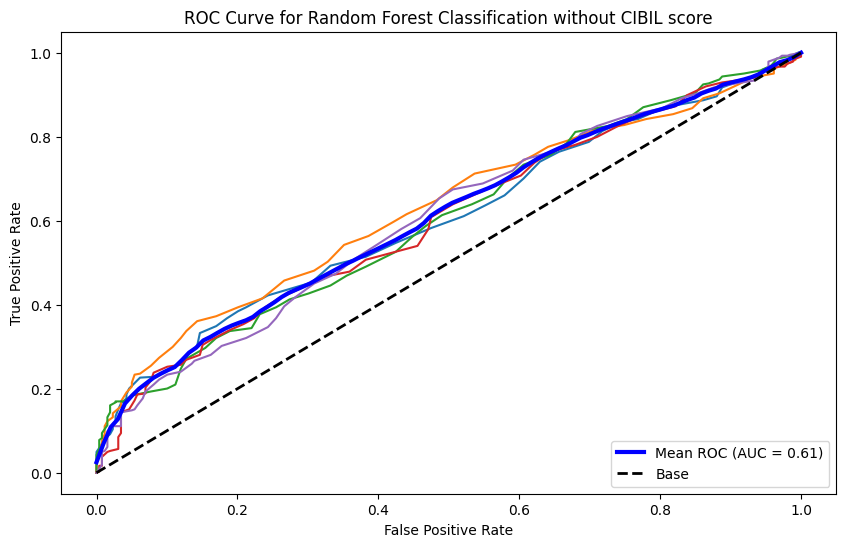

In [50]:
mean_fpr_rf2 = np.linspace(0, 1, 100)
mean_tpr_rf2 = 0

plt.figure(figsize = (10, 6))

for train, val in cv.split(x_train_almost2, y_train2):
    x_train_fold = pd.DataFrame(scaler_minmax.fit_transform(x_train_almost2.iloc[train].values))
    x_val_fold = pd.DataFrame(scaler_minmax.transform(x_train_almost2.iloc[val].values))
    y_train_fold = y_train2.iloc[train].values.ravel()
    y_val_fold = y_train2.iloc[val].values

    model_rf2.fit(x_train_fold, y_train_fold)
    pred_rf_fold2 = model_rf2.predict_proba(x_val_fold)[:, 1]
    fpr2, tpr2, _ = roc_curve(y_val_fold, pred_rf_fold2)
    mean_tpr_rf2 += np.interp(mean_fpr_rf2, fpr2, tpr2)

    plt.plot(fpr2, tpr2)

mean_tpr_rf2 /= cv.get_n_splits()

mean_auc_rf2 = auc(mean_fpr_rf2, mean_tpr_rf2)

plt.plot(mean_fpr_rf2, mean_tpr_rf2, linestyle = 'solid', color = 'b', label = f'Mean ROC (AUC = {mean_auc_rf2:.2f})', linewidth = 3)
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'black', label = 'Base', linewidth = 2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classification without CIBIL score')
plt.legend(loc = 'lower right')
plt.show()

In [51]:
grid_parameters_rf2 = {'n_estimators' : [50, 100, 150, 200, 250, 300, 350, 400, 450, 500], 'max_depth': [None, 10, 20, 30, 40, 50]}

grid_search_rf2 = GridSearchCV(model_rf2, grid_parameters_rf2, cv = 5, scoring = 'roc_auc', n_jobs = -1)

grid_search_rf2.fit(x_train2, y_train2.values.ravel())

best_params_rf2 = grid_search_rf2.best_params_
best_mean_auc_rf2 = grid_search_rf2.best_score_

print('Best Hyperparameters:', best_params_rf2)
print(f'Mean AUC: {best_mean_auc_rf2:.4f}')

Best Hyperparameters: {'max_depth': 30, 'n_estimators': 500}
Mean AUC: 0.6072


In [52]:
best_model_rf2 = RandomForestClassifier(max_depth = 30, n_estimators = 500, random_state = 42)
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

features2 = list(x_train_almost2.columns)
best_features_rf2 = []
selected_features_rf2 = []
best_auc_rf2 = -1

while features2:
    current_auc_scores_rf2 = []

    for feature in features2:
        current_features = best_features_rf2 + [feature]

        if feature in best_features_rf2:
            continue

        auc_scores_rf2 = []

        for train_idx, val_idx in cv.split(x_train_almost2[current_features], y_train2):
            x_train_fold = pd.DataFrame(scaler_minmax2.fit_transform(x_train_almost2[current_features].iloc[train_idx]))
            x_val_fold = pd.DataFrame(scaler_minmax2.transform(x_train_almost2[current_features].iloc[val_idx]))
            y_train_fold = y_train2.iloc[train_idx].values.ravel()
            y_val_fold = y_train2.iloc[val_idx].values.ravel() 

            model_subset2 = RandomForestClassifier(max_depth = 30, n_estimators = 500, random_state = 42)
            model_subset2.fit(x_train_fold, y_train_fold)

            y_pred2 = model_subset2.predict(x_val_fold)
            auc_rf2 = roc_auc_score(y_val_fold, y_pred2)
            auc_scores_rf2.append(auc_rf2)

        mean_auc2 = np.mean(auc_scores_rf2)
        current_auc_scores_rf2.append(mean_auc2)

    best_index2 = np.argmax(current_auc_scores_rf2)
    best_feature2 = features2[best_index2]
    best_feature_auc2 = current_auc_scores_rf2[best_index2]
    selected_features_rf2.append(best_feature2)
    features2.remove(best_feature2)

    print(f'Selected Features: {selected_features_rf2}')
    print(f'Mean AUC Score: {best_feature_auc2:.4f}')

    if best_feature_auc2 > best_auc_rf2:
        best_auc_rf2 = best_feature_auc2
        best_features_rf2.append(best_feature2)

        print(f'---> Best Features so far: {best_features_rf2}')

final_x_train_rf2 = pd.DataFrame(scaler_minmax2.fit_transform(x_train_almost2[best_features_rf2]))
best_model_rf2.fit(final_x_train_rf2, y_train2.values.ravel())

print('-----------------')
print(f'Best Features: {best_features_rf2}')
print(f'Final Mean AUC: {best_auc_rf2:.4f}')

Selected Features: ['loan_amount']
Mean AUC Score: 0.5066
---> Best Features so far: ['loan_amount']
Selected Features: ['loan_amount', 'loan_term']
Mean AUC Score: 0.5233
---> Best Features so far: ['loan_amount', 'loan_term']
Selected Features: ['loan_amount', 'loan_term', 'luxury_assets_value']
Mean AUC Score: 0.5551
---> Best Features so far: ['loan_amount', 'loan_term', 'luxury_assets_value']
Selected Features: ['loan_amount', 'loan_term', 'luxury_assets_value', 'income_annum']
Mean AUC Score: 0.5516
Selected Features: ['loan_amount', 'loan_term', 'luxury_assets_value', 'income_annum', 'bank_asset_value']
Mean AUC Score: 0.5515
Selected Features: ['loan_amount', 'loan_term', 'luxury_assets_value', 'income_annum', 'bank_asset_value', 'self_employed']
Mean AUC Score: 0.5466
Selected Features: ['loan_amount', 'loan_term', 'luxury_assets_value', 'income_annum', 'bank_asset_value', 'self_employed', 'education']
Mean AUC Score: 0.5441
Selected Features: ['loan_amount', 'loan_term', 'lux

In [53]:
best_model_rf2.fit(x_train2, y_train2.values.ravel())

RandomForestClassifier(max_depth=30, n_estimators=500, random_state=42)

In [54]:
y_pred_rf2 = best_model_rf2.predict(x_test2)

In [55]:
accuracy_rf2 = accuracy_score(y_test2, y_pred_rf2)
print(f'Accuracy of Random Forest without CIBIL score : {accuracy_rf2:.3f}')
precision_rf2 = precision_score(y_test2, y_pred_rf2)
print(f'Precision of Random Forest without CIBIL score : {precision_rf2:.3f}')
recall_rf2 = recall_score(y_test2, y_pred_rf2)
print(f'Recall of Random Forest without CIBIL score : {recall_rf2:.3f}')
f1score_rf2 = f1_score(y_test2, y_pred_rf2)
print(f'F1 Score of Random Forest without CIBIL score : {f1score_rf2:.3f}')

Accuracy of Random Forest without CIBIL score : 0.582
Precision of Random Forest without CIBIL score : 0.634
Recall of Random Forest without CIBIL score : 0.789
F1 Score of Random Forest without CIBIL score : 0.703


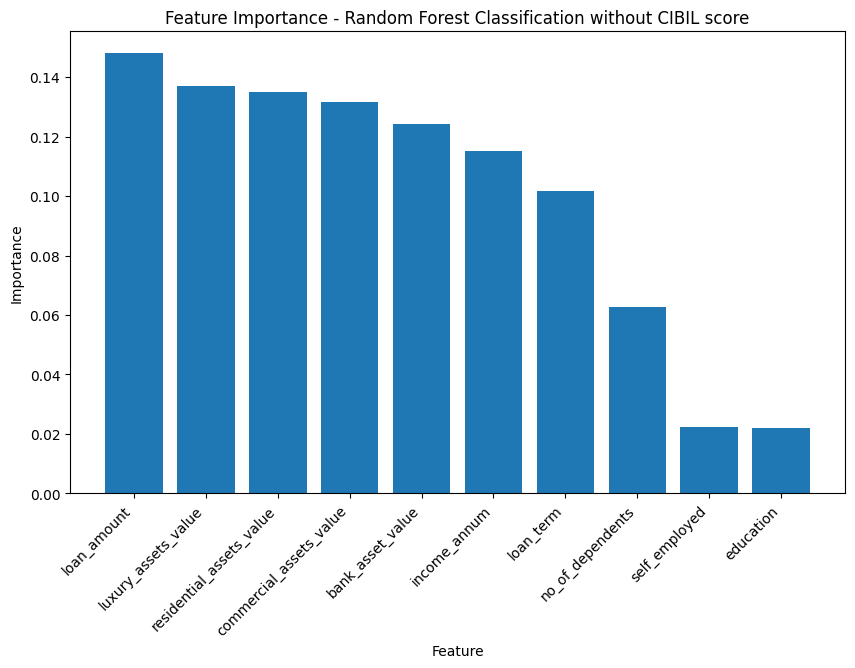

In [56]:
feature_importance_rf2 = best_model_rf2.feature_importances_

feature_importance_df_rf2 = pd.DataFrame({'Feature': x_train_almost2.columns, 'Importance': feature_importance_rf2})

feature_importance_df_rf2 = feature_importance_df_rf2.sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (10, 6))
plt.bar(feature_importance_df_rf2['Feature'], feature_importance_df_rf2['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance - Random Forest Classification without CIBIL score')
plt.xticks(rotation = 45, ha = 'right')
plt.show()